## PFS, PWOD, PFG Comparison Plots

This notebook will generate the plots for Figures 4,5 and 11 in the paper. In figs 4,5 we compare the PFS and PWOD algorithms on the I_infinity metric, as defined in the paper. In Fig 11, we compare the PFS and PFG variants on the same metric.

### Key for plots

In order to work with the LaTex macros used in our paper, we use certain macros as the titles in the plots below. To understand what they mean, please refer to the following key:

- `\noDistAlg`: PWOD algorithm
- `\ourAlg`: PFS algorithm
- `\bdkAlg`: BDK algorithm
- `\lDivAlg`: MVMD-3 algorithm

The `\padFactor` macro refers to the padding factor argument for the algorithms.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import sys
import os 
from collections import defaultdict


sys.path.insert(0, '..')
os.chdir('..')
print(os.getcwd())

%load_ext autoreload
%autoreload 2

/Users/pranayjain/Desktop/Security Research/constrained-padding-sequences


In [12]:
from bdk import run_bdk
from pfs import run_pfs, run_pfg
from pwod import run_pwod
from mvmd import run_mvmd
from utils import elementWiseDiff

#### Set the dataset

Set the dataset variable below. You may uncomment any of the lines below to generate the plots for the corresponding dataset.

The datasets `autocomplete`, `wikipedia` and `linode_from_index` will generate plots for Figure 4. The dataset `synthetic2` will generate the plot for figure 5.

In [5]:
dataset, max_len, leg_x, leg_y, y_lim = 'autocomplete', 14, 13, 5, 10
# dataset, max_len, leg_x, leg_y, y_lim = 'linode_from_index', 7, 0.5, 4.5, 10
# dataset, max_len, leg_x, leg_y, y_lim = 'wikipedia', 7, 13, 5, 13
# dataset, max_len, leg_x, leg_y, y_lim = 'synthetic2', 8, 1, 6, 8.5

In [9]:
if dataset == "synthetic2":
    sorted_c = [2.0]
else:
    sorted_c = [2.0, 1.5, 1.25, 1.05]

mp = {}
for c in sorted_c:
    _, pwod_i_inf = run_pwod(dataset, c)
    pfs_i_inf  = run_pfs(dataset, c)['i_inf']

    mp[f'\\ourAlg (\\padFactor={c})'] = pfs_i_inf
    mp[f'\\noDistAlg (\\padFactor={c})'] = pwod_i_inf

('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
i_inf for target sequence length 1 = 0.0
i_inf for target sequence length 2 = 1.0
i_inf for target sequence length 3 = 2.0
i_inf for target sequence length 4 = 2.807354922057604
i_inf for target sequence length 5 = 2.807354922057604
i_inf for target sequence length 6 = 3.169925001442312
i_inf for target sequence length 7 = 3.169925001442312
i_inf for target sequence length 8 = 3.169925001442312
i_inf for target sequence length 9 = 2.0
i_inf for target sequence length 10 = 1.0
i_inf for target sequence length 11 = 1.0
i_inf for target sequence length 12 = 0.0
i_inf for target sequence length 13 = 0.0
i_inf for target sequence length 14 = 0.0
('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
Set parameter Username
Academic license - for non-commercial use only - exp

In [13]:
ourAlg_stacked_mp, noDistAlg_stacked_mp = {}, {}

for i in range(len(sorted_c)):
    src = f'\\noDistAlg (\\padFactor={sorted_c[i]})'
    if i == 0: 
        updated_res = mp[src]
    else:
        updated_res = elementWiseDiff(
            mp[f'\\noDistAlg (\\padFactor={sorted_c[i-1]})'],
            mp[src],
        )
    noDistAlg_stacked_mp[src] = updated_res

for i in range(len(sorted_c)):
    src = f'\\ourAlg (\\padFactor={sorted_c[i]})'
    if i == 0: 
        updated_res = mp[src]
    else:
        updated_res = elementWiseDiff(
            mp[f'\\ourAlg (\\padFactor={sorted_c[i-1]})'],
            mp[src],
        )
    ourAlg_stacked_mp[src] = updated_res

In [15]:
ldiv_stacked_mp, bdk_stacked_mp = {}, {}
if dataset != "synthetic2":
    res_mvmd = run_mvmd(dataset)
    ldiv_stacked_mp["\\lDivAlg{3}"] = res_mvmd['i_inf']

    _, _, _, _, _, bdk_i_inf = run_bdk(dataset)
    bdk_stacked_mp["\\bdkAlg"] = bdk_i_inf

('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
311
1
2
3
4
5
6
7
8
9
10
11
12
13
max pad factor: 31.727272727272727
mean pad factor: 1.1088084928262534
('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
Completed BDK Run 0
Completed BDK Run 1
Completed BDK Run 2
Completed BDK Run 3
Completed BDK Run 4
Completed BDK Run 5
Completed BDK Run 6
Completed BDK Run 7
Completed BDK Run 8
Completed BDK Run 9
Completed BDK Run 10
Completed BDK Run 11
Completed BDK Run 12
Completed BDK Run 13
Completed BDK Run 14
Completed BDK Run 15
Completed BDK Run 16
Completed BDK Run 17
Completed BDK Run 18
Completed BDK Run 19
Completed BDK Run 20
Completed BDK Run 21
Completed BDK Run 22
Completed BDK Run 23
Completed BDK Run 24
Completed BDK Run 25
Completed BDK Run 26
Completed BDK Run 27
Completed BDK Run 28
Completed BDK Run 29

In [16]:
spacer_stacked_mp = {}
spacer_stacked_mp["spacer"] = [0] * max_len

In [17]:
colors = {}
colors["\\bdkAlg"] = "black"
colors["\\lDivAlg{3}"] = "grey" 
colors["\\noDistAlg"] = "whitesmoke"
colors["PFE"] = "whitesmoke"
colors["\\ourAlg"] = "lightgrey" 
colors["spacer"] = "white"

spaces = {}
spaces["\\bdkAlg"] = .2     
spaces["\\lDivAlg{3}"] = .2 
spaces["\\noDistAlg"] = .2  
spaces["PFE"] = .2
spaces["\\ourAlg"] = .2     
spaces["spacer"] = .2       

sq_w = .6 # square width
sq_h = .6 # square height

In [18]:
def draw_null_sq(x_offset, y_offset):
    square = patches.Rectangle((leg_x+x_offset*sq,leg_y+y_offset*sq), sq, sq, linewidth=1, edgecolor='black', facecolor="white")
    ax.add_patch(square)
    x1, y1 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq], [leg_y+y_offset*sq, leg_y+y_offset*sq+sq]
    x2, y2 = [leg_x+x_offset*sq, leg_x+x_offset*sq+sq], [leg_y+y_offset*sq+sq, leg_y+y_offset*sq]
    plt.plot(x1, y1, x2, y2, color="gray", linewidth=0.5)
    
def draw_null_rec_big(x_offset, y_offset):
    square = patches.Rectangle((leg_x+x_offset*sq_w,leg_y+y_offset*sq_h), sq_w*2, sq_h*4, linewidth=1, edgecolor='black', facecolor="white")
    ax.add_patch(square)
    x1, y1 = [leg_x+x_offset*sq_w, leg_x+x_offset*sq_w+sq_w*2], [leg_y+y_offset*sq_h, leg_y+y_offset*sq_h+sq_h*4]
    x2, y2 = [leg_x+x_offset*sq_w, leg_x+x_offset*sq_w+sq_w*2], [leg_y+y_offset*sq_h+sq_h*4, leg_y+y_offset*sq_h]
    plt.plot(x1, y1, x2, y2, color="gray", linewidth=0.5)
    
def draw_null_rec_small(x_offset, y_offset):
    square = patches.Rectangle((leg_x+x_offset*sq_w,leg_y+y_offset*sq_h), sq_w*2, sq_h, linewidth=1, edgecolor='black', facecolor="white")
    ax.add_patch(square)
    x1, y1 = [leg_x+x_offset*sq_w, leg_x+x_offset*sq_w+sq_w*2], [leg_y+y_offset*sq_h, leg_y+y_offset*sq_h+sq_h]
    x2, y2 = [leg_x+x_offset*sq_w, leg_x+x_offset*sq_w+sq_w*2], [leg_y+y_offset*sq_h+sq_h, leg_y+y_offset*sq_h]
    plt.plot(x1, y1, x2, y2, color="gray", linewidth=0.5)

hello world


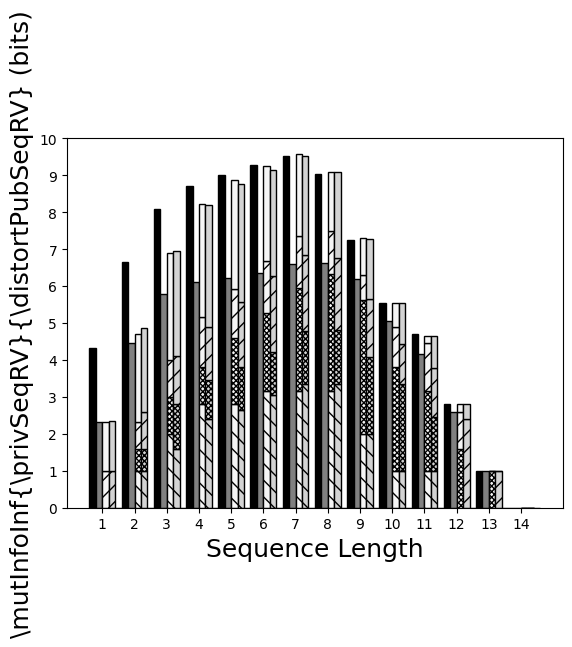

In [21]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()
#hatches = ['\\\\', '', '//', ''] # WORKS GOOD IF WE DON'T INCLUDE c=2.0
hatches = ['\\\\', 'xxxxxx', '//', '']
alphas = [1, 0.7, 0.4, 0.2]

# Plot data
def plot_stacked_bar(stacked_mp, x_offset = 0, edgecolor='black'):
    for i, (name, values) in enumerate(stacked_mp.items()):
        bottom = [0]*len(values) if i == 0 else [sum(x) for x in zip(*list(stacked_mp.values())[:i])]
        ax.bar(
            np.array(range(len(values))) + x_offset + 1, 
            values, 
            bottom=bottom, 
            width=spaces[name.split(" ")[0]],
            edgecolor=edgecolor,
            #color='white',
            color=colors[name.split(" ")[0]],
            hatch=hatches[i%len(hatches)] if name.split(" ")[0] in ["\\noDistAlg", "\\ourAlg"] else '',
            #alpha=alphas[i%len(alphas)],
            label=name,
            align='edge')

if dataset != "synthetic2":
    print('hello world')
    plot_stacked_bar(bdk_stacked_mp, x_offset=-0.4, edgecolor='black')
    plot_stacked_bar(ldiv_stacked_mp, x_offset=-0.2, edgecolor='black')
    plot_stacked_bar(noDistAlg_stacked_mp, x_offset=0, edgecolor='black')
    plot_stacked_bar(ourAlg_stacked_mp, x_offset=0.2, edgecolor='black')
    plot_stacked_bar(spacer_stacked_mp, x_offset=0.4, edgecolor='black')
else:
    plot_stacked_bar(noDistAlg_stacked_mp, x_offset=-0.2, edgecolor='black')
    plot_stacked_bar(ourAlg_stacked_mp, x_offset=0.0, edgecolor='black')
    #plot_stacked_bar(spacer_stacked_mp, x_offset=0.4, edgecolor='black')  
# Add legend
# ax.legend()
plt.xticks(range(1,max_len+1))
if dataset == "linode_from_index":
    ax.set_xlim(-1,8)
ax.set_ylim(0,y_lim)
ax.set_yticks(np.arange(0,y_lim+1,1))
plt.xlabel('Sequence Length', fontsize=18)
plt.ylabel('\mutInfoInf{\privSeqRV}{\distortPubSeqRV} (bits)', fontsize=18)

if dataset == "linode_from_index":
    square = patches.Rectangle((leg_x,leg_y), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\bdkAlg"])
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+sq_w,leg_y), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\lDivAlg{3}"])
    ax.add_patch(square)

    square = patches.Rectangle((leg_x+2*sq_w,leg_y+sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\noDistAlg"], hatch="\\\\")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+2*sq_w,leg_y+2*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\noDistAlg"], hatch="xxxxxx")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+2*sq_w,leg_y+3*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\noDistAlg"], hatch="//")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+2*sq_w,leg_y+4*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\noDistAlg"], hatch="")
    ax.add_patch(square)

    square = patches.Rectangle((leg_x+3*sq_w,leg_y+sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="\\\\")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+3*sq_w,leg_y+2*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="xxxxxx")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+3*sq_w,leg_y+3*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="//")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+3*sq_w,leg_y+4*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="")
    ax.add_patch(square)

    draw_null_rec_big(0,1)
    draw_null_rec_small(2,0)

    ax.text(leg_x-1.05, leg_y+2.25*sq_h, "\\padFactor", fontsize="large")
    ax.text(leg_x-.65, leg_y+4.25*sq_h, "1.05", fontsize="large")
    ax.text(leg_x-.65, leg_y+3.25*sq_h, "1.25", fontsize="large")
    ax.text(leg_x-.65, leg_y+2.25*sq_h, "1.5", fontsize="large")
    ax.text(leg_x-.65, leg_y+1.25*sq_h, "2.0", fontsize="large")
    ax.text(leg_x-.65, leg_y+0.25*sq_h, "$\\infty$", fontsize="large")

    ax.text(leg_x+0.25*sq_w, leg_y+5.2*sq_h, "\\bdkAlg", rotation='vertical', fontsize="large")
    ax.text(leg_x+1.25*sq_w, leg_y+5.2*sq_h, "\\lDivAlg{3}", rotation='vertical', fontsize="large")
    ax.text(leg_x+2.25*sq_w, leg_y+5.2*sq_h, "\\noDistAlg", rotation='vertical', fontsize="large")
    ax.text(leg_x+3.25*sq_w, leg_y+5.2*sq_h, "\\ourAlg", rotation='vertical', fontsize="large")
    
if dataset == "synthetic2":
    sq = .6
    
    square = patches.Rectangle((leg_x,leg_y+sq), 0.6*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\noDistAlg"], hatch="\\\\")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x,leg_y), 0.6*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="\\\\")
    ax.add_patch(square)
    
    ax.text(leg_x+0.8*sq, leg_y+1.25*sq, "\\noDistAlg (\\padFactor = 2.0)", fontsize="large")
    ax.text(leg_x+0.8*sq, leg_y+0.25*sq, "\\ourAlg (\\padFactor = 2.0)", fontsize="large")

# Show plot
plt.show()

## Figure 11: PFS vs PFG

In [50]:
for c in sorted_c:
    _, pfg_i_inf  = run_pfg(dataset, c)

    mp[f'PFE (\\padFactor={c})'] = pfg_i_inf

pfe_stacked_mp = {}

for i in range(len(sorted_c)):
    src = f'PFE (\\padFactor={sorted_c[i]})'
    if i == 0: 
        updated_res = mp[src]
    else:
        updated_res = elementWiseDiff(
            mp[f'PFE (\\padFactor={sorted_c[i-1]})'],
            mp[src],
        )
    pfe_stacked_mp[src] = updated_res

('c', 'co', 'cou', 'coul', 'could', 'couldn', 'couldn-', 'couldn-t')
('w', 'wo', 'wou', 'woul', 'would', 'wouldn', 'wouldn-', 'wouldn-t')
Gurobi's optimization method runtime (in seconds): 0.16145706176757812
i_inf for target sequence length 1 = 6.406853007629834e-16
i_inf for target sequence length 2 = 1.0000000000000007
i_inf for target sequence length 3 = 2.0000000000000004
i_inf for target sequence length 4 = 3.0000000000000004
i_inf for target sequence length 5 = 3.321928094887363
i_inf for target sequence length 6 = 3.5849625007211565
i_inf for target sequence length 7 = 4.0
i_inf for target sequence length 8 = 3.8073549220576046
i_inf for target sequence length 9 = 3.321928094887362
i_inf for target sequence length 10 = 2.8073549220576037
i_inf for target sequence length 11 = 2.8073549220576037
i_inf for target sequence length 12 = 1.0
i_inf for target sequence length 13 = 0.9999999999999997
i_inf for target sequence length 14 = 0.0
('c', 'co', 'cou', 'coul', 'could', 'couldn', 

hello world


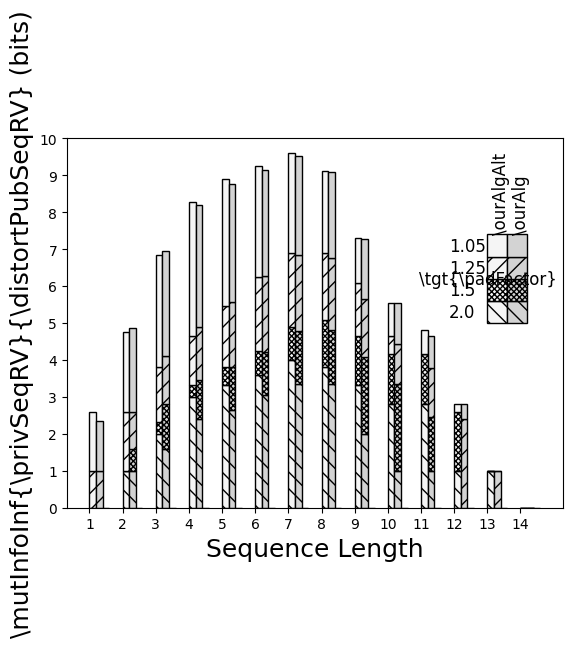

In [51]:
# Create a figure and a set of subplots
fig, ax = plt.subplots()
#hatches = ['\\\\', '', '//', ''] # WORKS GOOD IF WE DON'T INCLUDE c=2.0
hatches = ['\\\\', 'xxxxxx', '//', '']
alphas = [1, 0.7, 0.4, 0.2]

# Plot data
def plot_stacked_bar(stacked_mp, x_offset = 0, edgecolor='black'):
    for i, (name, values) in enumerate(stacked_mp.items()):
        bottom = [0]*len(values) if i == 0 else [sum(x) for x in zip(*list(stacked_mp.values())[:i])]
        ax.bar(
            np.array(range(len(values))) + x_offset + 1, 
            values, 
            bottom=bottom, 
            width=spaces[name.split(" ")[0]],
            edgecolor=edgecolor,
            #color='white',
            color=colors[name.split(" ")[0]],
            hatch=hatches[i%len(hatches)] if name.split(" ")[0] in ["\\noDistAlg", "\\ourAlg", "PFE"] else '',
            #alpha=alphas[i%len(alphas)],
            label=name,
            align='edge')

if dataset != "synthetic2":
    print('hello world')
    # plot_stacked_bar(bdk_stacked_mp, x_offset=-0.4, edgecolor='black')
    # plot_stacked_bar(ldiv_stacked_mp, x_offset=-0.2, edgecolor='black')
    plot_stacked_bar(pfe_stacked_mp, x_offset=0, edgecolor='black')
    plot_stacked_bar(ourAlg_stacked_mp, x_offset=0.2, edgecolor='black')
    plot_stacked_bar(spacer_stacked_mp, x_offset=0.4, edgecolor='black')
else:
    plot_stacked_bar(noDistAlg_stacked_mp, x_offset=-0.2, edgecolor='black')
    plot_stacked_bar(ourAlg_stacked_mp, x_offset=0.0, edgecolor='black')
    #plot_stacked_bar(spacer_stacked_mp, x_offset=0.4, edgecolor='black')  
# Add legend
#ax.legend()
plt.xticks(range(1,max_len+1))
if dataset == "linode_from_index":
    ax.set_xlim(-1,8)
ax.set_ylim(0,y_lim)
ax.set_yticks(np.arange(0,y_lim+1,1))
plt.xlabel('Sequence Length', fontsize=18)
plt.ylabel('\mutInfoInf{\privSeqRV}{\distortPubSeqRV} (bits)', fontsize=18)

if dataset == "autocomplete":
    square = patches.Rectangle((leg_x,leg_y), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["PFE"], hatch="\\\\")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x,leg_y+1*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["PFE"], hatch="xxxxxx")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x,leg_y+2*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["PFE"], hatch="//")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x,leg_y+3*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["PFE"], hatch="")
    ax.add_patch(square)

    square = patches.Rectangle((leg_x+1*sq_w,leg_y), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="\\\\")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+1*sq_w,leg_y+1*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="xxxxxx")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+1*sq_w,leg_y+2*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="//")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x+1*sq_w,leg_y+3*sq_h), sq_w, sq_h, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="")
    ax.add_patch(square)

    ax.text(leg_x-2.05, leg_y+1.75*sq_h, "\\tgt{\\padFactor}", fontsize="large")
    ax.text(leg_x-1.15, leg_y+3.25*sq_h, "1.05", fontsize="large")
    ax.text(leg_x-1.15, leg_y+2.25*sq_h, "1.25", fontsize="large")
    ax.text(leg_x-1.15, leg_y+1.25*sq_h, "1.5", fontsize="large")
    ax.text(leg_x-1.15, leg_y+0.25*sq_h, "2.0", fontsize="large")

    ax.text(leg_x+0.25*sq_w, leg_y+4.2*sq_h, "\\ourAlgAlt", rotation='vertical', fontsize="large")
    ax.text(leg_x+1.25*sq_w, leg_y+4.2*sq_h, "\\ourAlg", rotation='vertical', fontsize="large")
    
if dataset == "synthetic2":
    sq = .6
    
    square = patches.Rectangle((leg_x,leg_y+sq), 0.6*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\noDistAlg"], hatch="\\\\")
    ax.add_patch(square)
    square = patches.Rectangle((leg_x,leg_y), 0.6*sq, sq, linewidth=1, edgecolor='black', facecolor=colors["\\ourAlg"], hatch="\\\\")
    ax.add_patch(square)
    
    ax.text(leg_x+0.8*sq, leg_y+1.25*sq, "\\noDistAlg (\\padFactor = 2.0)", fontsize="large")
    ax.text(leg_x+0.8*sq, leg_y+0.25*sq, "\\ourAlg (\\padFactor = 2.0)", fontsize="large")

# Show plot
plt.show()